In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle

from utils.latticeeasy import *
from utils.label_utils import label_blobs, get_labels

# Load data

In [89]:
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_100_301.15863/trial_2/osc33_128/boost_0.02c_256"

data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_100_301.15863/trial_2/osc33_128/boost_0.02c_256',
 'alpha': 0.05,
 'beta': 100.0,
 'phi_0': 0.054515,
 'dt_pr': 0.0005,
 'dim': 3,
 'domain_width_pr': array([0.3375, 0.3375, 0.3375]),
 'domain_dimensions': (256, 256, 256),
 't': array([ 0.499995,  1.000019,  1.999946,  2.999874,  3.999801,  4.500004,
         5.000206,  5.500408,  6.00061 ,  6.500813,  7.001015,  7.501217,
         8.001417,  9.000868, 10.000319, 10.999769, 11.99922 , 12.998671,
        13.998121, 14.997572, 15.997023, 16.996473, 17.995924, 18.995375,
        19.994825, 20.994276, 21.993727, 22.993177, 23.992628, 24.992079,
        25.991529, 26.99098 , 27.990431, 28.989882, 29.989332, 30.988783,
        31.988234, 32.987682, 33.987133, 34.986584, 35.986034, 36.985485,
        37.984936, 38.984386, 39.983837, 40.983288, 41.982738, 42.982189,
        43.98164 , 44.981091, 45.980541, 46.979992, 47.979443, 48.978893,
        49.978344, 

# Find velocity

In [90]:
s = get_s(data.alpha)
c_pr = 1/data.a[0]**(s+1)
c_pr

0.0031399535903170075

In [91]:
WHOLE_FIELD = 1
if WHOLE_FIELD:
    f_ext = "_field"
else:
    f_ext = ""

In [92]:
timeslices = [i for i in range(0,data.t.size,1)][::]

In [93]:
coms_t_dict = pickle.load(open(os.path.join(output_dir,f"coms_t_dict{f_ext}.p"),'rb'))
com_velocities_t_dict = pickle.load(open(os.path.join(output_dir,f"com_velocities_t_dict{f_ext}.p"),'rb'))
# expected_velocities_t_dict = pickle.load(open(os.path.join(output_dir,f"expected_velocities_t_dict{f_ext}.p"),'rb'))

In [94]:
com_velocities = np.array([com_velocities_t_dict[data.t[timeslice]] for timeslice in timeslices[:-1]])
# expected_velocities = np.array([expected_velocities_t_dict[data.t[timeslice]] for timeslice in timeslices])

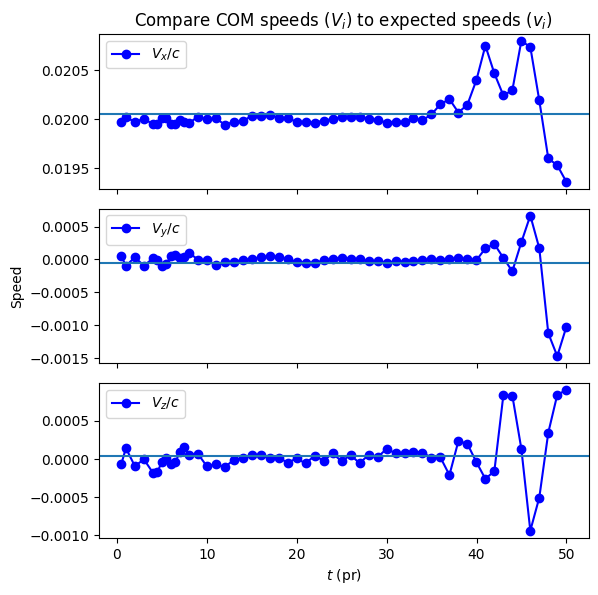

In [95]:
# T_pr = 2*np.pi/get_mass(data.alpha,data.beta) * data.rescale_B*data.a[0]**data.rescale_s

axis = ["x", "y", "z"]

fig, axes = plt.subplots(3,1,figsize=(6,6),tight_layout=True,sharex=True)

for i, ax in enumerate(axes):

#     ax.plot(data.t[timeslices],expected_velocities[:,i]/c_pr,ls='-.',label="$v_{}/c$".format(axis[i]), c='seagreen')

    ax.plot(data.t[timeslices][:-1],com_velocities[:,i]/c_pr,marker='o',label="$V_{}/c$".format(axis[i]), c='b')
    ax.axhline((com_velocities[:,i]/c_pr).mean())

    ax.legend()
    if i==0:
        ax.set_title("Compare COM speeds ($V_i$) to expected speeds ($v_i$)")
    if i==1:
        ax.set_ylabel(r"Speed")
    if i==2:
        ax.set_xlabel(r"$t$ (pr)")
        
# axes[0].set_ylim(0.009, 0.011)

plt.savefig(os.path.join(output_dir,f"compare speeds{f_ext}.png"),dpi=300,bbox_inches='tight')
plt.show()

In [96]:
(com_velocities[:,0]/c_pr).mean()

0.02005002039375833

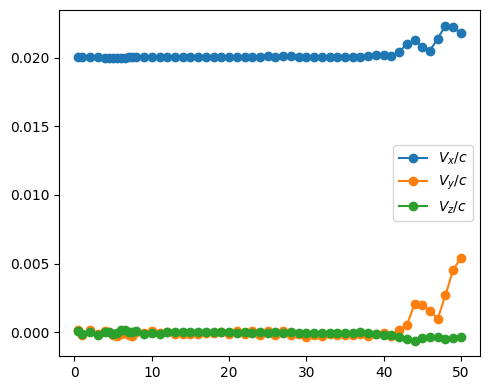

In [88]:
axis = ["x", "y", "z"]

fig, ax = plt.subplots(1,1,figsize=(5,4),tight_layout=True)

for i in range(3):

    ax.plot(data.t[timeslices][:-1],com_velocities[:,i]/c_pr,marker='o',label="$V_{}/c$".format(axis[i]))

    ax.legend()
#     if i==0:
#         ax.set_title("Compare COM speeds ($V_i$) to expected speeds ($v_i$)")
#     if i==1:
#         ax.set_ylabel(r"Speed")
#     if i==2:
#         ax.set_xlabel(r"$t$ (pr)")
        
# axes[0].set_ylim(0.009, 0.011)

# plt.savefig(os.path.join(output_dir,f"compare speeds{f_ext}.png"),dpi=300,bbox_inches='tight')
plt.show()

# If previous data saved...

In [ ]:
timeskip = 2

pos_com = np.loadtxt(os.path.join(output_dir,"pos_com.txt"))
com_dict = {t:com for t,com in zip(data.t[::timeskip],pos_com)}
pickle.dump(com_dict,open(os.path.join(output_dir,f"coms_t_dict{f_ext}.p"),'wb'))

v_com = np.loadtxt(os.path.join(output_dir,"velocity_com.txt"))
v_com_dict = {t:v for t,v in zip(data.t[::timeskip],v_com)}
pickle.dump(v_com_dict,open(os.path.join(output_dir,f"com_velocities_t_dict{f_ext}.p"),'wb'))

v_exp = np.loadtxt(os.path.join(output_dir,"velocity_expected.txt"))
v_exp_dict = {t:v for t,v in zip(data.t[::timeskip],v_exp)}
pickle.dump(v_exp_dict,open(os.path.join(output_dir,f"expected_velocities_t_dict{f_ext}.p"),'wb'))